In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("dementia_patients_health_data.csv")
data.head(10)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
5,1,0.114028,94,94.546754,36.678071,66.592329,21.154863,Rivastigmine,1.5,67,...,Former Smoker,Positive,Mild Activity,Yes,1,No,Low-Carb Diet,Poor,Diabetes,1
6,1,0.016194,90,96.423361,37.024630,83.976553,11.350612,Donepezil,10.0,87,...,Never Smoked,Positive,Mild Activity,No,7,No,Mediterranean Diet,Poor,Diabetes,1
7,0,0.161158,98,92.007370,36.050294,69.653564,30.339413,NaN,NaN,66,...,Former Smoker,Negative,Mild Activity,No,9,Yes,Low-Carb Diet,Poor,Hypertension,0
8,0,0.015754,69,99.859490,36.955259,53.725078,36.629687,NaN,NaN,66,...,Former Smoker,Positive,Mild Activity,No,10,Yes,Mediterranean Diet,Poor,NaN,0
9,1,0.097340,64,90.319068,36.396286,58.366698,49.175758,Rivastigmine,3.0,87,...,Former Smoker,Positive,Sedentary,Yes,7,Yes,Balanced Diet,Good,Diabetes,1


In [3]:
data.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [5]:
data = data.drop(["Prescription", "Dosage in mg", "Chronic_Health_Conditions"], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Diabetic               1000 non-null   int64  
 1   AlcoholLevel           1000 non-null   float64
 2   HeartRate              1000 non-null   int64  
 3   BloodOxygenLevel       1000 non-null   float64
 4   BodyTemperature        1000 non-null   float64
 5   Weight                 1000 non-null   float64
 6   MRI_Delay              1000 non-null   float64
 7   Age                    1000 non-null   int64  
 8   Education_Level        1000 non-null   object 
 9   Dominant_Hand          1000 non-null   object 
 10  Gender                 1000 non-null   object 
 11  Family_History         1000 non-null   object 
 12  Smoking_Status         1000 non-null   object 
 13  APOE_ε4                1000 non-null   object 
 14  Physical_Activity      1000 non-null   object 
 15  Depre

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
data["Education_Level"] = pd.DataFrame(le.fit_transform(data["Education_Level"]))

In [9]:
data["Dominant_Hand"] = pd.DataFrame(le.fit_transform(data["Dominant_Hand"]))

In [10]:
data["Gender"] = pd.DataFrame(le.fit_transform(data["Gender"]))

In [11]:
data["Family_History"] = pd.DataFrame(le.fit_transform(data["Family_History"]))

In [12]:
data["Smoking_Status"] = pd.DataFrame(le.fit_transform(data["Smoking_Status"]))

In [13]:
data["APOE_ε4"] = pd.DataFrame(le.fit_transform(data["APOE_ε4"]))

In [14]:
data["Physical_Activity"] = pd.DataFrame(le.fit_transform(data["Physical_Activity"]))

In [15]:
data["Depression_Status"] = pd.DataFrame(le.fit_transform(data["Depression_Status"]))

In [16]:
data["Medication_History"] = pd.DataFrame(le.fit_transform(data["Medication_History"]))

In [17]:
data["Nutrition_Diet"] = pd.DataFrame(le.fit_transform(data["Nutrition_Diet"]))

In [18]:
data["Sleep_Quality"] = pd.DataFrame(le.fit_transform(data["Sleep_Quality"]))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Diabetic               1000 non-null   int64  
 1   AlcoholLevel           1000 non-null   float64
 2   HeartRate              1000 non-null   int64  
 3   BloodOxygenLevel       1000 non-null   float64
 4   BodyTemperature        1000 non-null   float64
 5   Weight                 1000 non-null   float64
 6   MRI_Delay              1000 non-null   float64
 7   Age                    1000 non-null   int64  
 8   Education_Level        1000 non-null   int32  
 9   Dominant_Hand          1000 non-null   int32  
 10  Gender                 1000 non-null   int32  
 11  Family_History         1000 non-null   int32  
 12  Smoking_Status         1000 non-null   int32  
 13  APOE_ε4                1000 non-null   int32  
 14  Physical_Activity      1000 non-null   int32  
 15  Depre

In [20]:
data.head(10)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,2,0,...,0,0,0,2,0,10,0,1,1,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,3,1,...,0,1,1,1,0,1,1,1,1,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,2,1,...,1,1,0,1,0,8,0,2,1,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,3,0,...,1,2,0,0,1,5,1,0,1,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,3,1,...,1,2,1,0,0,0,1,1,0,1
5,1,0.114028,94,94.546754,36.678071,66.592329,21.154863,67,1,0,...,0,1,1,0,1,1,0,1,1,1
6,1,0.016194,90,96.423361,37.024630,83.976553,11.350612,87,2,1,...,0,2,1,0,0,7,0,2,1,1
7,0,0.161158,98,92.007370,36.050294,69.653564,30.339413,66,3,1,...,0,1,0,0,0,9,1,1,1,0
8,0,0.015754,69,99.859490,36.955259,53.725078,36.629687,66,3,1,...,0,1,1,0,0,10,1,2,1,0
9,1,0.097340,64,90.319068,36.396286,58.366698,49.175758,87,0,0,...,0,1,1,2,1,7,1,0,0,1


In [21]:
data.shape

(1000, 21)

In [22]:
X = data.iloc[:, :20]
y = data.iloc[:, 20:]

In [23]:
X.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,2,0,0,0,0,0,2,0,10,0,1,1
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,3,1,1,0,1,1,1,0,1,1,1,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,2,1,1,1,1,0,1,0,8,0,2,1
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,3,0,0,1,2,0,0,1,5,1,0,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,3,1,1,1,2,1,0,0,0,1,1,0


In [24]:
y.head()

,Dementia
0,0
1,1
2,0
3,1
4,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create the linear regression model
model = LinearRegression()

In [27]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [29]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.00175262 -0.24159109  0.00088344 -0.00392901  0.01821897 -0.00027335
  -0.00084996 -0.00067469  0.00132395 -0.00833836  0.00344399 -0.00429617
   0.0303532   0.11305028 -0.00694703  0.26568384 -0.108864   -0.00336714
   0.00504442  0.02211845]]
Intercept: [0.74220193]


# Logistic Regression on Breast Cancer Dataset

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
data = pd.read_csv("breast_cancer.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [32]:
X = data.drop(["diagnosis", "id"], axis=1)
y = data["diagnosis"]

In [33]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
y = pd.DataFrame(le.fit_transform(y))

In [37]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create the linear regression model
model = LogisticRegression()

In [40]:
# Train the model on the training data
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model is :", accuracy*100)

f1_score = f1_score(y_test, y_pred)
print("F1 Score of Logistic Regression Model is :", f1_score)

Accuracy of Logistic Regression Model is : 95.6140350877193
F1 Score of Logistic Regression Model is : 0.9397590361445783


# Clustering for Customer Segmentation

In [43]:
import pandas as pd
from sklearn.cluster import KMeans

In [44]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
# Drop customer ID (not relevant for segmentation)
data.drop('CustomerID', axis=1, inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
data["Gender"] = pd.DataFrame(le.fit_transform(data["Gender"]))
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# Standardize features (age, income, spending) for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [51]:
# Define number of clusters (adjust based on your data and needs)
n_clusters = 3

In [52]:
# Create KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [53]:
# Train the model on the scaled data
kmeans.fit(data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [54]:
# Assign cluster labels to each data point
data['Cluster'] = kmeans.labels_

In [55]:
# Print cluster centroids (optional)
print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[ 0.03792108 -0.77529133  0.04688104  0.88056434]
 [-0.88640526  0.44680201 -0.10812358 -0.5442077 ]
 [ 1.12815215  0.74307816  0.06431159 -0.79449512]]


In [56]:
# Analyze customer segments based on cluster labels and original features
# You can use descriptive statistics or data visualization techniques here
print(data.groupby('Cluster').describe())

        Gender                                                Age             \
         count      mean       std  min  25%  50%  75%  max count       mean   
Cluster                                                                        
0         85.0  0.458824  0.501259  0.0  0.0  0.0  1.0  1.0  85.0  28.047059   
1         66.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  66.0  45.075758   
2         49.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  49.0  49.204082   

         ... Annual Income (k$)        Spending Score (1-100)             \
         ...                75%    max                  count       mean   
Cluster  ...                                                               
0        ...               78.0  137.0                   85.0  72.882353   
1        ...               71.5  126.0                   66.0  36.181818   
2        ...               78.0  137.0                   49.0  29.734694   

                                                  
           

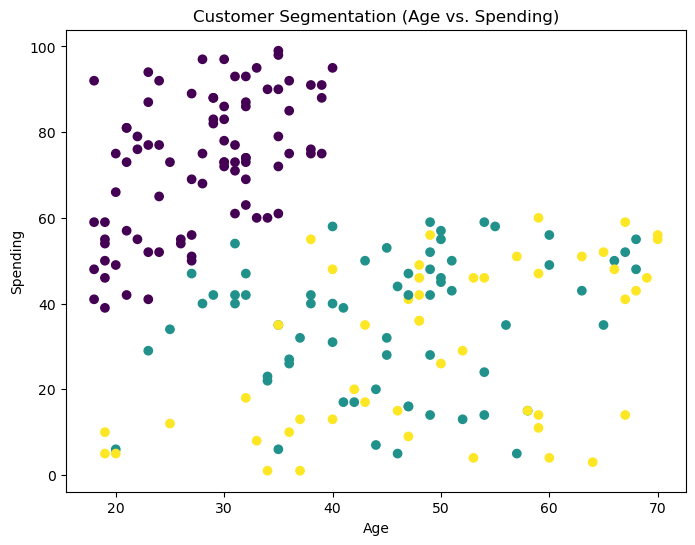

In [57]:
import matplotlib.pyplot as plt

# Visualize data using scatter plots (adjust variable names as needed)
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Customer Segmentation (Age vs. Spending)')
plt.show()